<a href="https://colab.research.google.com/github/GiulianoPepato/university-codes/blob/main/Atividade_3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras import layers

Importando os dados e definindo as features que serão usadas. Baixe os dados [dessa planilha](https://docs.google.com/spreadsheets/d/1IWTDPTQuvCUY7WWvFygvdRcdfjl_771qE9Orf1SzQBs/edit?usp=sharing)

In [ ]:
csv_file_path = '/content/HIGGS_100k.csv'
df = pd.read_csv(csv_file_path)

In [ ]:
features = ['lepton_pT', 'lepton_eta', 'lepton_phi',
            'm.e.m', 'm.e.p', 'jet_1_pt',
            'j_1_eta', 'jet_1_phi', 'jet_1_b-tag',
            'jet_2_pt','j_2_eta', 'jet_2_phi', 'jet_2_b-tag',
            'jet_3_pt','j_3_eta', 'jet_3_phi', 'jet_3_b-tag',
            'jet_4_pt','j_4_eta', 'jet_4_phi', 'jet_4_b-tag']

#Analisando os dados

Procurando dados faltantes

In [ ]:
print('Verificando valores faltantes por feature:') #programado pelo Gemini
for feature in features:
    missing_count = df[feature].isnull().sum()
    if missing_count > 0:
        print(f"Feature '{feature}': {missing_count} valores faltantes")
    else:
        print(f"Feature '{feature}': Nenhum valor faltante")

Verificando valores faltantes por feature:
Feature 'lepton_pT': Nenhum valor faltante
Feature 'lepton_eta': Nenhum valor faltante
Feature 'lepton_phi': Nenhum valor faltante
Feature 'm.e.m': Nenhum valor faltante
Feature 'm.e.p': Nenhum valor faltante
Feature 'jet_1_pt': Nenhum valor faltante
Feature 'j_1_eta': Nenhum valor faltante
Feature 'jet_1_phi': Nenhum valor faltante
Feature 'jet_1_b-tag': Nenhum valor faltante
Feature 'jet_2_pt': Nenhum valor faltante
Feature 'j_2_eta': Nenhum valor faltante
Feature 'jet_2_phi': Nenhum valor faltante
Feature 'jet_2_b-tag': Nenhum valor faltante
Feature 'jet_3_pt': Nenhum valor faltante
Feature 'j_3_eta': Nenhum valor faltante
Feature 'jet_3_phi': Nenhum valor faltante
Feature 'jet_3_b-tag': Nenhum valor faltante
Feature 'jet_4_pt': Nenhum valor faltante
Feature 'j_4_eta': Nenhum valor faltante
Feature 'jet_4_phi': Nenhum valor faltante
Feature 'jet_4_b-tag': Nenhum valor faltante


Imprimindo os histogramas de cada feature

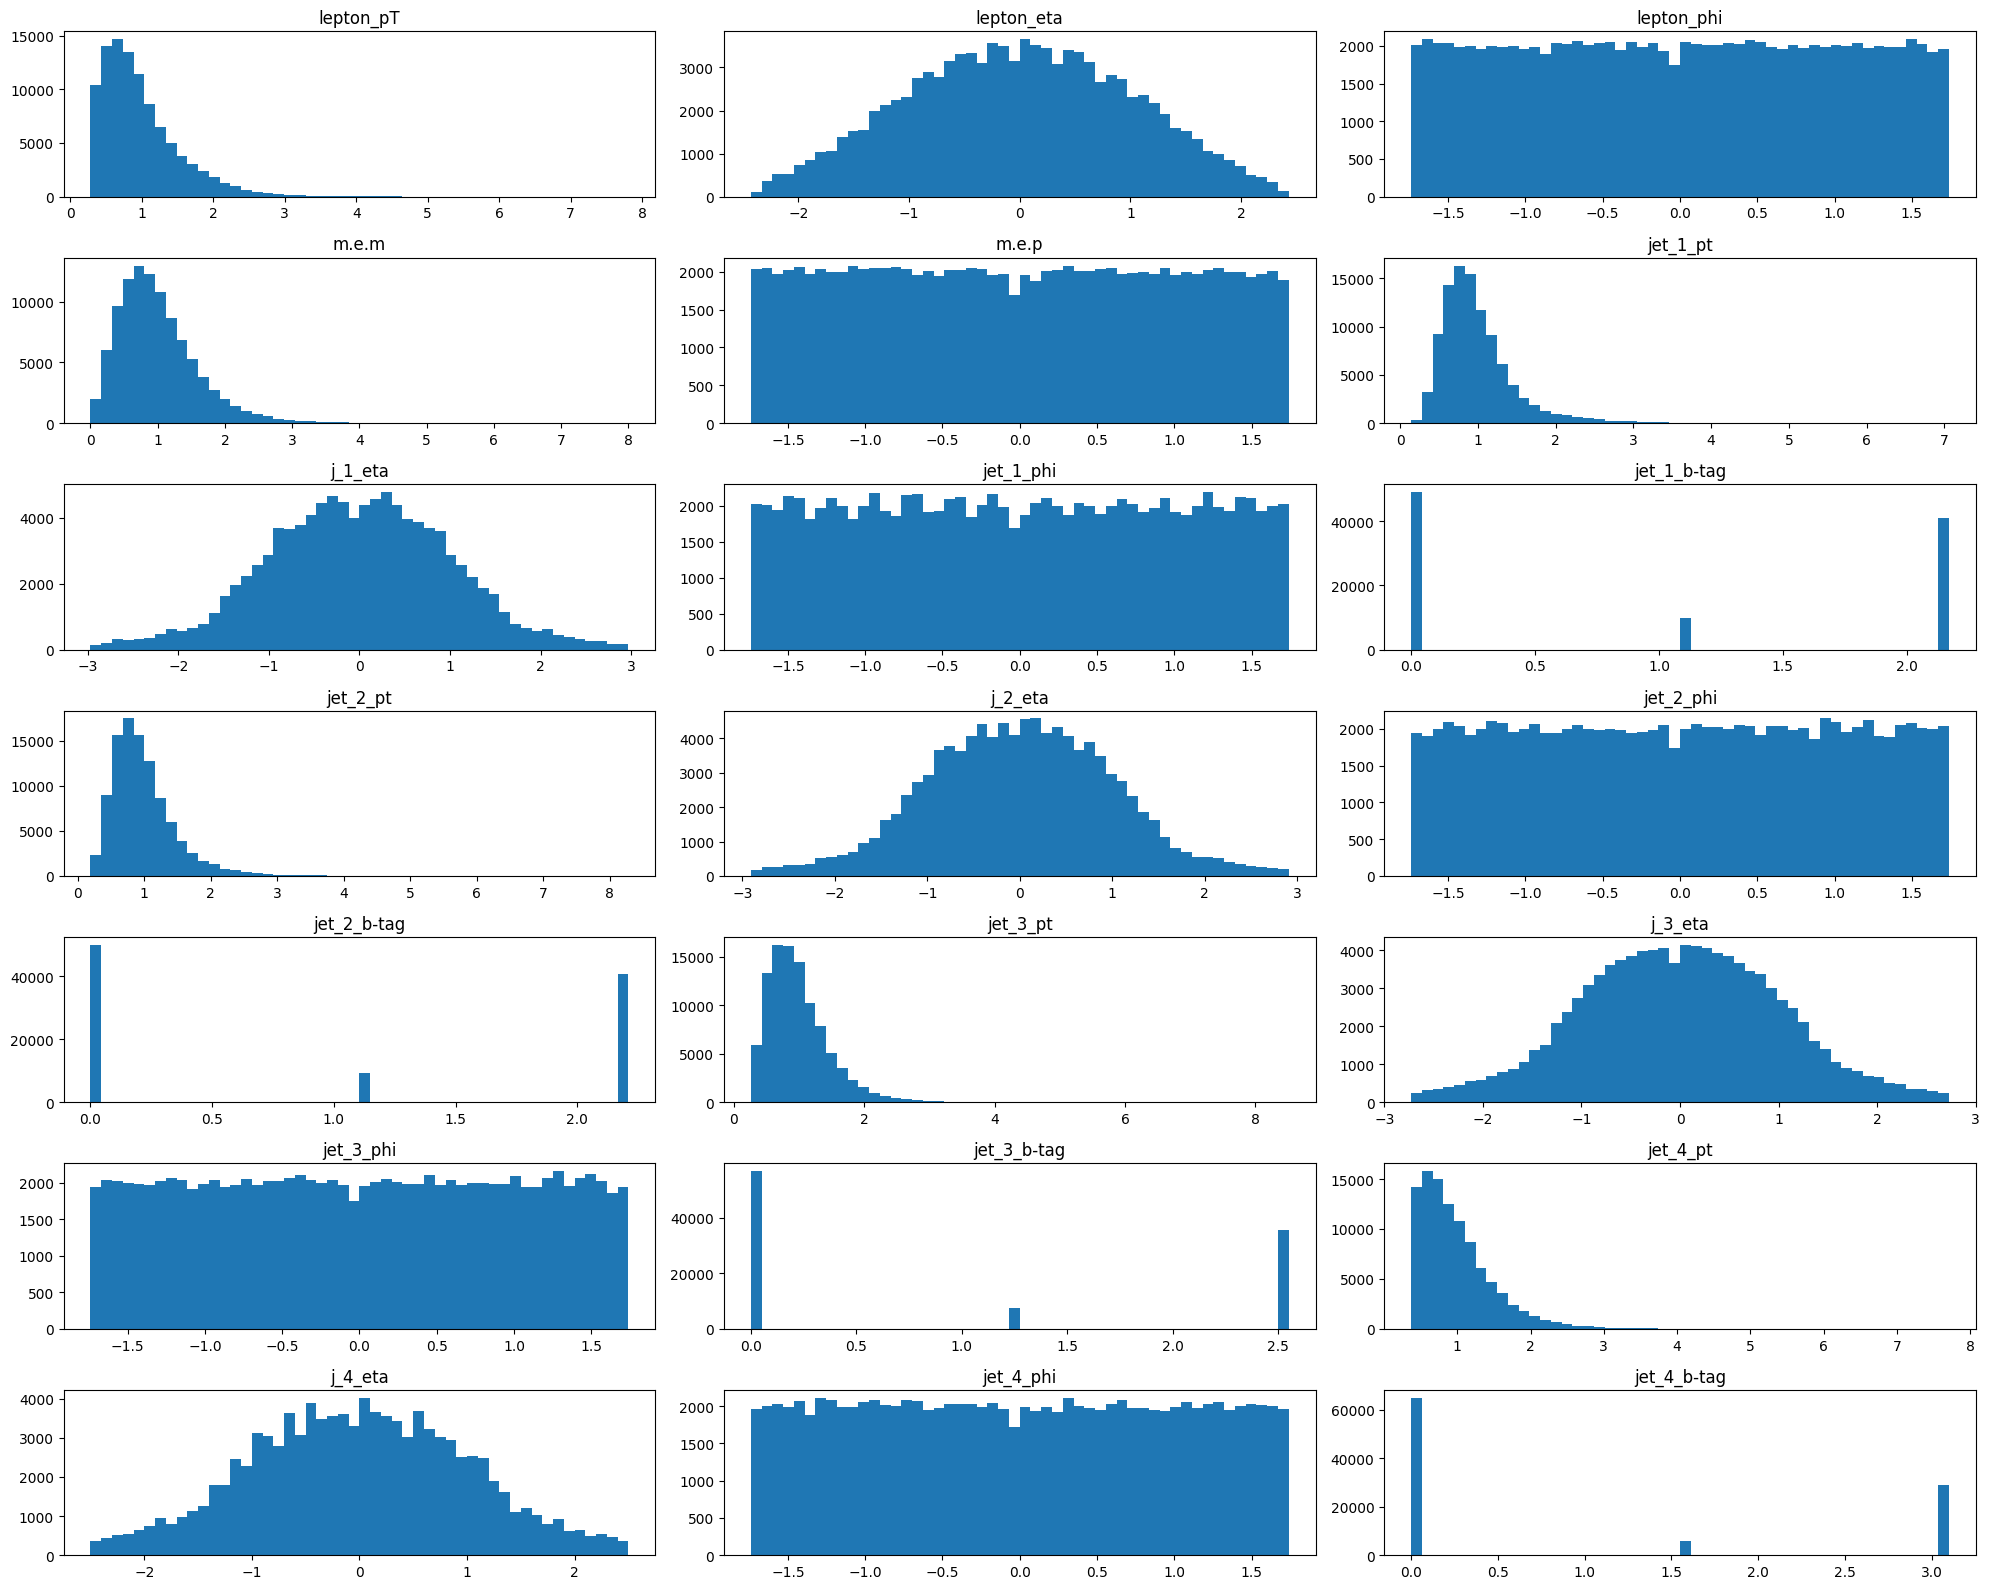

In [ ]:
fig, axs = plt.subplots(nrows = 7, ncols = 3, figsize = (20,16))

h=0
for i in range(7):
  for j in range(3):
    axs[i,j].hist(df[features[j+h]], bins = 50)
    axs[i, j].set_title(features[j+h])
  h += 3

plt.tight_layout()


plt.show()

In [ ]:
for feature in features:
  plt.figure(figsize= (8,6))
  plt.hist(df[feature], bins = 50, color = 'green', edgecolor = 'gray')
  plt.title(feature)
  plt.ylabel('Frequency')
  plt.show()
  print('')

Vendo quais valores são únicos em cada um dos b-tag

In [ ]:
btag = ['jet_1_b-tag', 'jet_2_b-tag', 'jet_3_b-tag', 'jet_4_b-tag']

for k in btag:
  values = df[k].unique().tolist()
  print(f'Os únicos valores de {k} são:')
  print(values)
  print('')

Os únicos valores de jet_1_b-tag são:
[0.0, 2.17, 1.09]

Os únicos valores de jet_2_b-tag são:
[1.11, 2.21, 0.0]

Os únicos valores de jet_3_b-tag são:
[0.0, 2.55, 1.27]

Os únicos valores de jet_4_b-tag são:
[3.1, 0.0, 1.55]



#Pré-Processamento

transformando os dados dos b-tag

atribuindo a matriz de features X e o atributo alvo y e separando em conjuntos de treino, teste e validação.

In [ ]:
alvo = ['class_label']

X = df[features+['m_wwbb']]
y = df[alvo].astype(int)

In [ ]:
train_ratio = 0.70
test_ratio = 0.19
validation_ratio = 0.11

random_state = 777

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=1 - train_ratio,
                                                    stratify = y,
                                                    random_state = random_state)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test,
test_size=test_ratio/(test_ratio + validation_ratio),
                                                stratify = y_test,
                                                random_state = random_state)

print(f"train = {len(X_train)} \ntest = {len(X_test)} \nval = {len(X_val)}")

X_train_d = X_train.drop(columns = ['m_wwbb'])
X_test_d = X_test.drop(columns = ['m_wwbb'])
X_val_d = X_val.drop(columns = ['m_wwbb'])

train = 70000 
test = 19001 
val = 11000


#Arquitetura da Rede Neural

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(len(features),)),

    layers.Dense(60, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(45, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(30, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 60)             │         1,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 45)             │         2,745 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 45)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 30)             │         1,380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,476 (21.39 KB)

 Trainable params: 5,476 (21.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train_d.values, y_train.values.flatten(),
    validation_data=(X_val_d.values, y_val.values.flatten()),
    epochs= 60,
    verbose=1
)

Epoch 1/60
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5263 - loss: 0.6938 - val_accuracy: 0.5750 - val_loss: 0.6757
Epoch 2/60
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5646 - loss: 0.6783 - val_accuracy: 0.5749 - val_loss: 0.6715
Epoch 3/60
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5835 - loss: 0.6699 - val_accuracy: 0.5982 - val_loss: 0.6625
Epoch 4/60
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.5949 - loss: 0.6636 - val_accuracy: 0.6095 - val_loss: 0.6582
Epoch 5/60
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6027 - loss: 0.6599 - val_accuracy: 0.6137 - val_loss: 0.6557
Epoch 6/60
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.6077 - loss: 0.6565 - val_accuracy: 0.6150 - val_loss: 0.6516
Epoch 7/60
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.6075 - loss: 0.6565 - val_accuracy: 0.6197 - val_loss: 0.6542
Epoch 8/60
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6156 - loss: 0.6

#Resultados

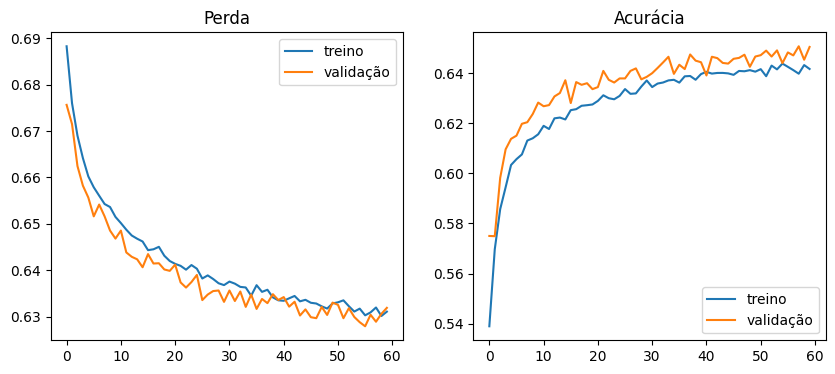

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='treino')
plt.plot(history.history['val_accuracy'], label='validação')
plt.title('Acurácia')
plt.legend()
plt.show()

#Histograma

In [ ]:
X_tt = pd.concat([X_val, X_test])
X_tt['y pred'] = model.predict(X_tt.drop(columns = ['m_wwbb']))
X_tt['y pred'] = X_tt['y pred'].apply(lambda x: round(x))

938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


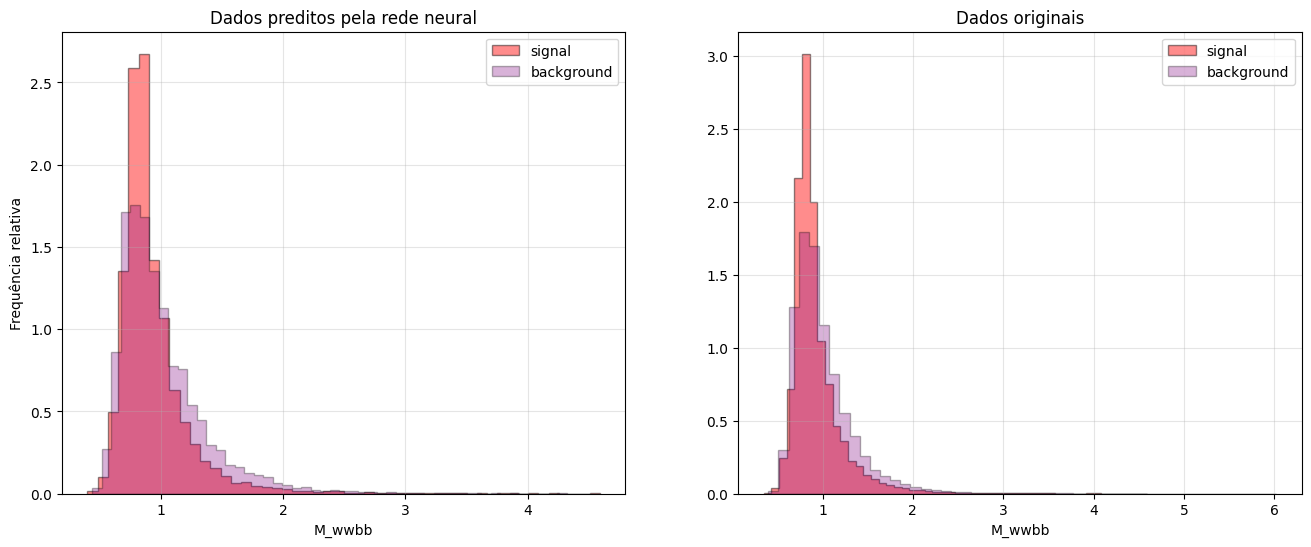

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.hist(X_tt['m_wwbb'][X_tt['y pred'] == 1], bins = 50,label = 'signal',
         color = 'red', alpha = 0.45, edgecolor = 'black',
         histtype='stepfilled', density = True)
plt.hist(X_tt['m_wwbb'][X_tt['y pred'] == 0], bins = 50, label = 'background',
         color = 'purple', alpha = 0.3, edgecolor = 'black',
         histtype='stepfilled', density = True)
plt.legend()
plt.title('Dados preditos pela rede neural')
plt.xlabel('M_wwbb')
plt.ylabel('Frequência relativa')
plt.grid(alpha = 0.32)

plt.subplot(1,2,2)
plt.hist(df['m_wwbb'][df['class_label'] == 1], bins = 50,label = 'signal',
         color = 'red', alpha = 0.45, edgecolor = 'black',
         histtype='stepfilled', density = True)
plt.hist(df['m_wwbb'][df['class_label'] == 0], bins = 50, label = 'background',
         color = 'purple', alpha = 0.3, edgecolor = 'black',
         histtype='stepfilled', density = True)
plt.legend()
plt.title('Dados originais')
plt.xlabel('M_wwbb')
plt.grid(alpha = .32)

plt.show()

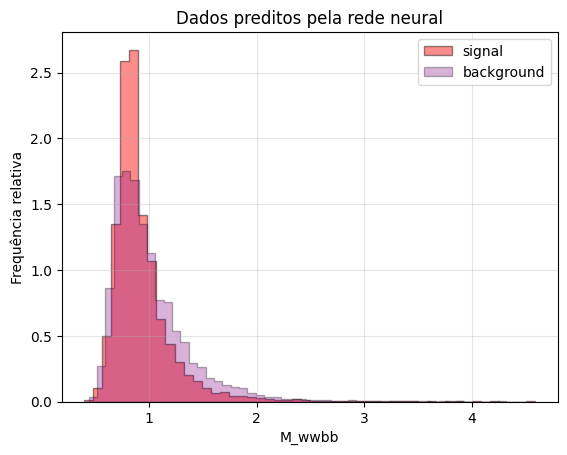

In [ ]:
plt.figure()
plt.hist(X_tt['m_wwbb'][X_tt['y pred'] == 1], bins = 50,label = 'signal',
         color = 'red', alpha = 0.45, edgecolor = 'black',
         histtype='stepfilled', density = True)
plt.hist(X_tt['m_wwbb'][X_tt['y pred'] == 0], bins = 50, label = 'background',
         color = 'purple', alpha = 0.3, edgecolor = 'black',
         histtype='stepfilled', density = True)
plt.legend()
plt.title('Dados preditos pela rede neural')
plt.xlabel('M_wwbb')
plt.ylabel('Frequência relativa')
plt.grid(alpha = 0.32)
plt.show()

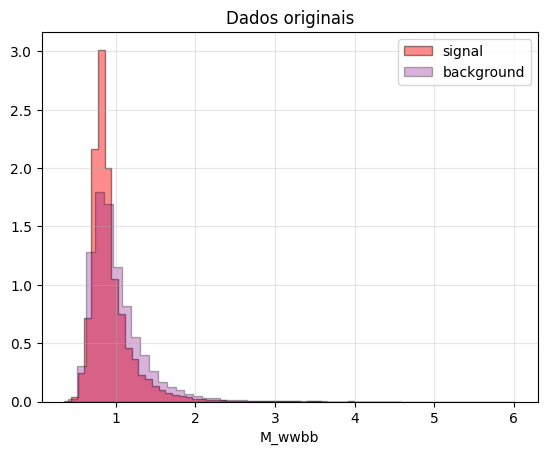

In [ ]:
plt.figure()
plt.hist(df['m_wwbb'][df['class_label'] == 1], bins = 50,label = 'signal',
         color = 'red', alpha = 0.45, edgecolor = 'black',
         histtype='stepfilled', density = True)
plt.hist(df['m_wwbb'][df['class_label'] == 0], bins = 50, label = 'background',
         color = 'purple', alpha = 0.3, edgecolor = 'black',
         histtype='stepfilled', density = True)
plt.legend()
plt.title('Dados originais')
plt.xlabel('M_wwbb')
plt.grid(alpha = .32)

plt.show()

In [ ]:
X_ttt = pd.concat([X_test, X_train, X_val])
X_ttt['y pred'] = model.predict(X_ttt.drop(columns = ['m_wwbb']))
X_ttt['y pred'] = X_ttt['y pred'].apply(lambda x: round(x))

3126/3126 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


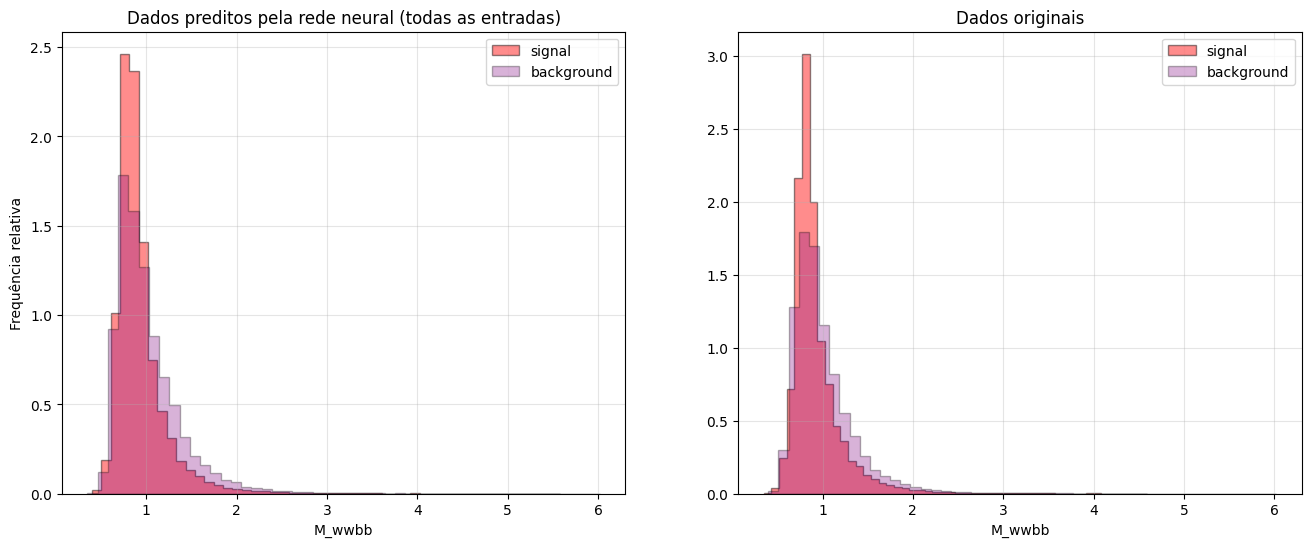

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.hist(X_ttt['m_wwbb'][X_ttt['y pred'] == 1], bins = 50,label = 'signal',
         color = 'red', alpha = 0.45, edgecolor = 'black',
         histtype='stepfilled', density = True)
plt.hist(X_ttt['m_wwbb'][X_ttt['y pred'] == 0], bins = 50, label = 'background',
         color = 'purple', alpha = 0.3, edgecolor = 'black',
         histtype='stepfilled', density = True)
plt.legend()
plt.title('Dados preditos pela rede neural (todas as entradas)')
plt.xlabel('M_wwbb')
plt.ylabel('Frequência relativa')
plt.grid(alpha = 0.32)

plt.subplot(1,2,2)
plt.hist(df['m_wwbb'][df['class_label'] == 1], bins = 50,label = 'signal',
         color = 'red', alpha = 0.45, edgecolor = 'black',
         histtype='stepfilled', density = True)
plt.hist(df['m_wwbb'][df['class_label'] == 0], bins = 50, label = 'background',
         color = 'purple', alpha = 0.3, edgecolor = 'black',
         histtype='stepfilled', density = True)
plt.legend()
plt.title('Dados originais')
plt.xlabel('M_wwbb')
plt.grid(alpha = .32)

plt.show()

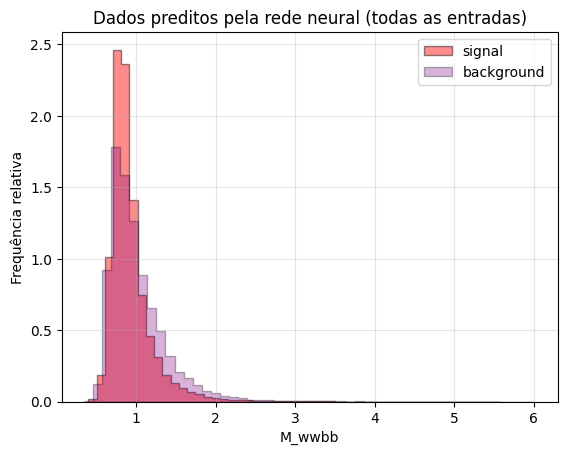

In [ ]:
plt.figure()
plt.hist(X_ttt['m_wwbb'][X_ttt['y pred'] == 1], bins = 50,label = 'signal',
         color = 'red', alpha = 0.45, edgecolor = 'black',
         histtype='stepfilled', density = True)
plt.hist(X_ttt['m_wwbb'][X_ttt['y pred'] == 0], bins = 50, label = 'background',
         color = 'purple', alpha = 0.3, edgecolor = 'black',
         histtype='stepfilled', density = True)
plt.legend()
plt.title('Dados preditos pela rede neural (todas as entradas)')
plt.xlabel('M_wwbb')
plt.ylabel('Frequência relativa')
plt.grid(alpha = 0.32)
plt.show()

#Varias avaliações

In [ ]:
neuronios = [[60,60,60], [60,50,40], [40,40,40], [60, 45, 30]]
actfun = ['gelu', 'relu']

In [ ]:
def neural_work(neuronios, af):
    model = keras.Sequential([
        layers.Input(shape=(len(features),)),
        layers.Dense(neuronios[0], activation=af),
        layers.Dense(neuronios[1], activation=af),
        layers.Dense(neuronios[2], activation=af),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    return model

In [ ]:
def neural_hist(model):
  history = model.fit(
      X_train, y_train,
      validation_data=(X_val, y_val),
      epochs=50,
      verbose=1
  )
  return history

In [ ]:
def plot_results(history, neuronios, af):
  print(f'Desempenho da rede neural com a sequência de neurônios {neuronios} e a função de ativação {af}')
  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  plt.plot(history.history['loss'], label='treino')
  plt.plot(history.history['val_loss'], label='validação')
  plt.title('Perda')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(history.history['accuracy'], label='treino')
  plt.plot(history.history['val_accuracy'], label='validação')
  plt.title('Acurácia')
  plt.legend()
  plt.show()

In [ ]:
acuracias = []
for n in neuronios:
  for af in actfun:
    model = neural_work(n, af)
    history = neural_hist(model)
    plot_results(history, n, af)
    acuracias.append(history.history['val_accuracy'][-1])

print(f'A rede com melhor desempenho foi {acuracias.index(max(acuracias))}')